## Importacion de Librerias y Carga de Datos

In [4]:
# importacion de librerias

import pandas as pd

In [5]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("../datasets/propiedades_merged_all.csv.csv")


df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Superficie Balcones,Garage,Parrillero,Orientación,Cocina,Año de Construcción,Jardín,Dormitorios Servicio,Calefacción,Acepta Mascotas,Piscina,Plantas,Seguridad,Disposición,Lavadero,Dormitorios Suite,Propiedad Horizontal,Muebles,Pisos Edificio,Altura,Aptos por piso,Gastos Comúnes,Patio,Piso
0,https://www.casasymas.com.uy/propiedad/82127-v...,U$S 240.000Venta,4,3.0,390 m²,302m²,390m²,8m²,Garaje: 4,Parrillero,Este,Cocina Definida,1978.0,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/177316-...,U$S 850.000Venta,4,2.0,612 m²,328m²,612m²,NaN,Garaje: 4,NaN,NaN,Cocina Definida,1945.0,Jardín,Dormitorios de Servicio: 1,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/194470-...,U$S 267.000Venta,5,3.0,301 m²,174m²,NaN,NaN,Garaje: 1,NaN,Este,Cocina Definida,1.0,NaN,NaN,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.casasymas.com.uy/propiedad/195384-...,U$S 215.000Venta,2,2.0,161 m²,90m²,451m²,NaN,Cochera: 4,Parrillero,Este,Cocina Integrada,1937.0,NaN,NaN,esfufa alto rendimiento,Acepta Mascotas,Piscina,1.0,"rejas, alarma, cerca electrica",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.casasymas.com.uy/propiedad/174669-...,U$S 395.000Venta,4,2.0,345 m²,185m²,160m²,NaN,Garaje: 4,NaN,Sur,Cocina Definida,1975.0,Jardín,NaN,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1635 non-null   object 
 1   precio                 1635 non-null   object 
 2   Dormitorios            1635 non-null   object 
 3   Baños                  1580 non-null   float64
 4   Superficie             1483 non-null   object 
 5   Superficie Construida  1493 non-null   object 
 6   Superficie Terreno     1282 non-null   object 
 7   Superficie Balcones    297 non-null    object 
 8   Garage                 1092 non-null   object 
 9   Parrillero             386 non-null    object 
 10  Orientación            794 non-null    object 
 11  Cocina                 1098 non-null   object 
 12  Año de Construcción    1031 non-null   float64
 13  Jardín                 649 non-null    object 
 14  Dormitorios Servicio   275 non-null    object 
 15  Cale

# Limpieza de datos

## Eliminamos duplicados del dataset

Es solamente un chequeo ya que cuando mergeamos los datos ya eliminamos duplicados. Este codigo tiene que dar SIEMPRE 0. 

In [8]:
duplicados = df.duplicated(subset=['url'])
print(f'Duplicados encontrados por URL: {duplicados.sum()}')

Duplicados encontrados por URL: 571


In [9]:
len(df)

1635

In [10]:
df = df.drop_duplicates(subset='url')

## DROP DE COLUMNAS -- CRITERIO

Vamos a dropear todas las columnas que tengan menos de 650 datos como criterio inicial. Luego podemos ver de cambiarlo, pero eso será el criterio inicial.

In [11]:
non_null_counts = df.notnull().sum()

# columnas que no deben eliminarse, aunque no cumplan con el crierio

protected_columns = [
    'Parrillero',
    'Calefacción',
    'Año de Construcción',
    'Jardín',
    'Piscina',
    'Patio'
]

# aplicamos criterio

columns_to_drop = non_null_counts[non_null_counts < 650].index

columns_to_drop = [col for col in columns_to_drop if col not in protected_columns]

df = df.drop(columns=columns_to_drop)

print("Columnas restantes:", df.columns.tolist())
print(f"\nColumnas eliminadas: {len(columns_to_drop)}")
print(f"\nColumnas protegidas mantenidas: {[col for col in protected_columns if col in df.columns]}")

Columnas restantes: ['url', 'precio', 'Dormitorios', 'Baños', 'Superficie', 'Superficie Construida', 'Superficie Terreno', 'Garage', 'Parrillero', 'Cocina', 'Año de Construcción', 'Jardín', 'Calefacción', 'Piscina', 'Patio']

Columnas eliminadas: 16

Columnas protegidas mantenidas: ['Parrillero', 'Calefacción', 'Año de Construcción', 'Jardín', 'Piscina', 'Patio']


In [12]:
print(columns_to_drop)

['Superficie Balcones', 'Orientación', 'Dormitorios Servicio', 'Acepta Mascotas', 'Plantas', 'Seguridad', 'Disposición', 'Lavadero', 'Dormitorios Suite', 'Propiedad Horizontal', 'Muebles', 'Pisos Edificio', 'Altura', 'Aptos por piso', 'Gastos Comúnes', 'Piso']


In [13]:
df.columns

Index(['url', 'precio', 'Dormitorios', 'Baños', 'Superficie',
       'Superficie Construida', 'Superficie Terreno', 'Garage', 'Parrillero',
       'Cocina', 'Año de Construcción', 'Jardín', 'Calefacción', 'Piscina',
       'Patio'],
      dtype='object')

In [14]:
len(df)

1064

In [15]:
df = df.drop(columns=['Dormitorios Suite', 'Dormitorios Servicio', 'Orientación', 'Disposición'], errors='ignore')

In [16]:
# Filtrar las filas que tienen NaN en 'superficie_construida' o 'superficie_terreno'

filas_con_nan = df[df[['Superficie Construida', 'Superficie Terreno', 'Superficie']].isnull().any(axis=1)]

# Mostrar las filas con NaN
print(filas_con_nan)

                                                    url              precio  \
2     https://www.casasymas.com.uy/propiedad/194470-...    U$S 267.000Venta   
8     https://www.casasymas.com.uy/propiedad/128325-...    U$S 175.000Venta   
9     https://www.casasymas.com.uy/propiedad/186448-...    U$S 695.000Venta   
16    https://www.casasymas.com.uy/propiedad/195315-...    U$S 345.000Venta   
17    https://www.casasymas.com.uy/propiedad/115044-...    U$S 695.000Venta   
...                                                 ...                 ...   
1602  https://www.casasymas.com.uy/propiedad/193413-...    U$S 179.900Venta   
1609  https://www.casasymas.com.uy/propiedad/137351-...    U$S 340.000Venta   
1615  https://www.casasymas.com.uy/propiedad/176803-...    U$S 125.000Venta   
1625  https://www.casasymas.com.uy/propiedad/1322-ca...  U$S 2.000.000Venta   
1630  https://www.casasymas.com.uy/propiedad/153800-...    U$S 515.000Venta   

     Dormitorios  Baños Superficie Superficie Const

In [17]:
len(df)

1064

## Registros fuera de criterios

Criterios:

* Dormitorios: eliminar a partir de 10 dormitorios
* Baños: eliminar a partir de 5 baños
* Garage: eliminar a partir de 5 garages

In [18]:
# Convrtir a string para poder manipular
df['Garage'] = df['Garage'].astype(str)

# Reemplazar "Garaje:" y "Cochera:" por nada (dejar solo el número)

df['Garage'] = df['Garage'].str.replace('Garaje:', '', regex=False)
df['Garage'] = df['Garage'].str.replace('Cochera:', '', regex=False)

# Limpiar espacios en blanco

df['Garage'] = df['Garage'].str.strip()

# Reemplazar 'nan' y strings vacíos por '0'

df['Garage'] = df['Garage'].replace(['nan', '', 'None'], '0')

# Convertir a int

df['Garage'] = df['Garage'].astype(int)

In [19]:
len(df)

1064

In [20]:
# convertir columna 'Dormitorios' a numeric

df['Dormitorios'] = pd.to_numeric(df['Dormitorios'], errors='coerce')

In [21]:
len(df)

1064

In [22]:
# Identificamos las filas a eliminar (las que tienen valores extremos)

rows_to_drop = df[(df['Dormitorios'] >= 10) | (df['Baños'] >= 5) | (df['Garage'] >= 5)].index

print(f"Filas a eliminar: {len(rows_to_drop)}")

# Eliminamos esas filas

df = df.drop(rows_to_drop)

print(f"Filas restantes: {len(df)}")
df.head(5)

Filas a eliminar: 133
Filas restantes: 931


,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Parrillero,Cocina,Año de Construcción,Jardín,Calefacción,Piscina,Patio
0,https://www.casasymas.com.uy/propiedad/82127-v...,U$S 240.000Venta,4.0,3.0,390 m²,302m²,390m²,4,Parrillero,Cocina Definida,1978.0,Jardín,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/177316-...,U$S 850.000Venta,4.0,2.0,612 m²,328m²,612m²,4,NaN,Cocina Definida,1945.0,Jardín,NaN,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/194470-...,U$S 267.000Venta,5.0,3.0,301 m²,174m²,NaN,1,NaN,Cocina Definida,1.0,NaN,NaN,NaN,NaN
3,https://www.casasymas.com.uy/propiedad/195384-...,U$S 215.000Venta,2.0,2.0,161 m²,90m²,451m²,4,Parrillero,Cocina Integrada,1937.0,NaN,esfufa alto rendimiento,Piscina,NaN
4,https://www.casasymas.com.uy/propiedad/174669-...,U$S 395.000Venta,4.0,2.0,345 m²,185m²,160m²,4,NaN,Cocina Definida,1975.0,Jardín,NaN,NaN,NaN


In [23]:
# revisamos nuevo length del dataset

len(df)

931

## Limpieza de campos

Algunos campos tienen incoherencias entonces queremos dejarlos lo mas limpio posibles para nuestro analisis.

In [24]:
# columna "precio" -> eliminamos el "U$S" y "Venta"

df['precio'] = df['precio'].str.replace("U\\$S", "", regex=True)
df['precio'] = df['precio'].str.replace("Venta", "", regex=True)
df['precio'] = df['precio'].str.replace(".", "", regex=False)
df['precio'] = df['precio'].str.strip()
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

print(df['precio'].head())

0    240000.0
1    850000.0
2    267000.0
3    215000.0
4    395000.0
Name: precio, dtype: float64


In [25]:
# columna "dormitorio" -> cambiamos "Monoambiente" por 0.

df['Dormitorios'] = df['Dormitorios'].replace("Monoambiente", 0)
df['Dormitorio'] = pd.to_numeric(df['Dormitorios'], errors='coerce')

df = df.drop(columns=['Dormitorios'])

In [26]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero

df['Superficie Construida'] = df['Superficie Construida'].str.replace("mÂ²", "", regex=False)
df['Superficie Construida'] = df['Superficie Construida'].str.replace("m²", "", regex=False)

# eliminar espacios

df['Superficie Construida'] = df["Superficie Construida"].str.strip()

# convertir a numero

df['Superficie Construida'] = pd.to_numeric(df['Superficie Construida'], errors='coerce')

In [27]:
# columna "Superficie Terreno" -> sacamos "mÂ²" y "m²", dejando solo el numero

df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("mÂ²", "", regex=False)
df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("m²", "", regex=False)

# eliminar espacios

df['Superficie Terreno'] = df["Superficie Terreno"].str.strip()

# convertir a numero

df['Superficie Terreno'] = pd.to_numeric(df['Superficie Terreno'], errors='coerce')

In [28]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero

df['Superficie'] = df['Superficie'].str.replace("mÂ²", "", regex=False)
df['Superficie'] = df['Superficie'].str.replace("m²", "", regex=False)

# eliminar espacios

df['Superficie'] = df["Superficie"].str.strip()

# convertir a numero

df['Superficie'] = pd.to_numeric(df['Superficie'], errors='coerce')

In [29]:
# revisamos nuevo length del dataset luego de estas modificaciones

len(df)

931

In [30]:
# chequeamos filas con NaN en precio

df['precio'].isna().sum()

np.int64(2)

In [31]:
# drop de filas con NaN en precio

df = df[df['precio'].notna()]

In [32]:
# chequeamos que no quede nada con NaN en precio

df[df['precio'].isna()]

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Parrillero,Cocina,Año de Construcción,Jardín,Calefacción,Piscina,Patio,Dormitorio


In [33]:
# revisamos nuevo length del dataset

len(df)

929

In [34]:
# eliminar chacras del dataset con criterio Superficie Terreno > 20.000

rows_to_drop = df[df['Superficie Terreno'] > 20000].index

df = df.drop(rows_to_drop)

In [35]:
print("Filas eliminadas:", len(rows_to_drop))

Filas eliminadas: 5


In [36]:
print("Filas antes de mapear municipio:", len(df))


Filas antes de mapear municipio: 924


## AGREGAR BARRIOS

Agregamos la columna de barrio y municipio al dataset. 

In [37]:
barrios = {
    "aguada": "B",
    "aires-puros": "C",
    "atahualpa": "C",
    "banados-de-carrasco": "F",
    "barrio-sur": "B",
    "belvedere": "A",
    "brazo-oriental": "C",
    "buceo": "CH",
    "bella-vista": "C",
    "capurro": "C",
    "carrasco": "E",
    "carrasco-norte": "E",
    "casabo": "A",
    "pajas-blancas": "A",
    "casavalle": "D",
    "castro": "D",
    "perez-castellanos": "D",
    "centro": "B",
    "cerrito": "D",
    "cerro": "A",
    "ciudad-vieja": "B",
    "colon": "G",
    "conciliacion": "G",
    "cordon": "B",
    "abayuba": "G",
    "flor-de-maronas": "F",
    "ituzaingo": "F",
    "jacinto-vera": "C",
    "jardines-del-hipodromo": "F",
    "la-paloma": "A",
    "la-teja": "A",
    "larranaga": "C",
    "las-acacias": "D",
    "las-canteras": "E",
    "lezica": "G",
    "melilla": "G",
    "malvin": "E",
    "malvin-norte": "E",
    "paso-de-las-duranas": "G",
    "manga": "F",
    "toledo-chico": "D",
    "maronas": "F",
    "parque-guarani": "F",
    "mercado-modelo": "C",
    "bolivar": "C",
    "nuevo-paris": "A",
    "palermo": "B",
    "parque-batlle": "CH",
    "villa-dolores": "CH",
    "parque-rodo": "B",
    "paso-de-la-arena": "A",
    "penarol": "G",
    "lavalleja": "G",
    "piedras-blancas": "D",
    "pocitos": "CH",
    "prado": "A",
    "nueva-savona": "A",
    "punta-carretas": "CH",
    "punta-gorda": "E",
    "punta-rieles": "F",
    "bella-italia": "F",
    "reducto": "C",
    "sayago": "G",
    "tres-cruces": "B",
    "tres-ombues": "A",
    "victoria": "A",
    "union": "D",
    "villa-espanola": "D",
    "villa-garcia": "F",
    "villa-munoz": "C",
    "paso-molino": "A",
    "la-comercial": "B",
    "san-nicolas": "E",
    "goes": "C",
    "parque-rivera": "E",
    "la-blanqueada": "CH",
    "la-figurita": "C"
}

barrios_sorted = sorted(barrios, key=len, reverse = True)

def extraer_barrios_de_url(url: str) -> str | None:
    for barrio in barrios_sorted:
        if barrio in url:
            return barrio
    return None

df["barrio"] = df["url"].apply(extraer_barrios_de_url)
df["municipio"] = df["barrio"].map(barrios)


In [38]:
print("Rows sin municipio luego del mapeo:", df['municipio'].isna().sum())


Rows sin municipio luego del mapeo: 51


In [39]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 51


In [40]:
# Cantidad de filas antes del drop
antes = len(df)

# Filas con barrio nulo
faltan_barrio = df['barrio'].isna().sum()
print("Filas con barrio nulo:", faltan_barrio)

# Aplicar el dropna
df = df.dropna(subset=['barrio']).reset_index(drop=True)

# Cantidad de filas después del drop
despues = len(df)

print("Filas antes :", antes)
print("Filas después:", despues)
print("Filas eliminadas:", antes - despues)


Filas con barrio nulo: 51
Filas antes : 924
Filas después: 873
Filas eliminadas: 51


In [41]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 0


## AGREGAR COLUMNA BARRIO

In [42]:
barrios = df['url']

print(barrios)

0      https://www.casasymas.com.uy/propiedad/82127-v...
1      https://www.casasymas.com.uy/propiedad/177316-...
2      https://www.casasymas.com.uy/propiedad/194470-...
3      https://www.casasymas.com.uy/propiedad/195384-...
4      https://www.casasymas.com.uy/propiedad/174669-...
                             ...                        
868    https://www.casasymas.com.uy/propiedad/196265-...
869    https://www.casasymas.com.uy/propiedad/153800-...
870    https://www.casasymas.com.uy/propiedad/181506-...
871    https://www.casasymas.com.uy/propiedad/190639-...
872    https://www.casasymas.com.uy/propiedad/111235-...
Name: url, Length: 873, dtype: object


## ONE HOT ENCODING + TRANSFORMACIONES EN AÑO DE CONSTRUCCIÓN

In [43]:
# Columnas a binarizar

columns_to_binarize = ['Parrillero', 'Calefacción', 'Jardín', 'Piscina', 'Patio']

for col in columns_to_binarize:
    if col in df.columns:

        df[col] = df[col].notna().astype(int)
        print(f"{col}: {df[col].sum()} propiedades tienen esta característica")
    else:
        print(f"Columna '{col}' no encontrada en el dataset")

print("\nDistribución de características:")
for col in columns_to_binarize:
    if col in df.columns:
        print(f"{col}:")
        print(f"  Sí (1): {df[col].sum()}")
        print(f"  No (0): {(df[col] == 0).sum()}")

Parrillero: 169 propiedades tienen esta característica
Calefacción: 82 propiedades tienen esta característica
Jardín: 319 propiedades tienen esta característica
Piscina: 120 propiedades tienen esta característica
Patio: 159 propiedades tienen esta característica

Distribución de características:
Parrillero:
  Sí (1): 169
  No (0): 704
Calefacción:
  Sí (1): 82
  No (0): 791
Jardín:
  Sí (1): 319
  No (0): 554
Piscina:
  Sí (1): 120
  No (0): 753
Patio:
  Sí (1): 159
  No (0): 714


## AÑO DE CONSTRUCCION

Si el Año de construcción es < 1800, le sumamos 1900. 

In [44]:
import numpy as np

# Convert to numeric, coercing errors to NaN
df['Año de Construcción'] = pd.to_numeric(df['Año de Construcción'], errors='coerce')

# If year is less than 1800, add 1900
df.loc[df['Año de Construcción'] < 1800, 'Año de Construcción'] += 1900

In [45]:
# calcular promedio de año de construcción por bario y almacenarlo en un dict. 
avg_year_by_barrio = df.groupby('barrio')['Año de Construcción'].mean().to_dict()

print(avg_year_by_barrio)

{'aguada': 1917.0, 'aires-puros': 1976.3333333333333, 'atahualpa': 1946.0, 'barrio-sur': 1942.0, 'bella-vista': 1951.0, 'belvedere': 1976.6666666666667, 'bolivar': 1970.0, 'brazo-oriental': 1953.7368421052631, 'buceo': 1950.2777777777778, 'capurro': 1985.0, 'carrasco': 1966.4563106796118, 'carrasco-norte': 1987.6346153846155, 'centro': 1927.875, 'cerro': 1952.857142857143, 'ciudad-vieja': 1909.75, 'colon': 1973.75, 'conciliacion': 1963.5, 'cordon': 1927.375, 'flor-de-maronas': 1959.25, 'goes': 1916.3333333333333, 'ituzaingo': nan, 'jacinto-vera': 1951.625, 'jardines-del-hipodromo': 1941.0, 'la-blanqueada': 1955.2727272727273, 'la-comercial': 1943.125, 'la-figurita': 1947.0, 'la-teja': 1942.8, 'larranaga': 2025.0, 'lezica': nan, 'malvin': 1961.6153846153845, 'malvin-norte': 1982.0, 'manga': 1955.0, 'maronas': 1976.2, 'mercado-modelo': nan, 'nuevo-paris': 1970.0, 'pajas-blancas': 1945.5, 'palermo': 1935.2857142857142, 'parque-batlle': 1927.7222222222222, 'parque-rivera': nan, 'parque-rod

In [46]:
# función para fillear valores que tengan 1901 o null con el promedio de año de construcción del barrio

def fill_year_with_barrio_avg(row):
    year = row['Año de Construcción']
    barrio = row['barrio']

    # si el año es NaN o 1901, reemplazo con el promedio del barrio
    if pd.isna(year) or year == 1901:
        if barrio in avg_year_by_barrio and not pd.isna(avg_year_by_barrio[barrio]):
            return avg_year_by_barrio[barrio]
        else:
            # si el barrio no tiene un promedio, reemplazo con el promedio global (todos los barrios)
            return df['Año de Construcción'].mean()

    return year

na_count_before = df['Año de Construcción'].isna().sum()
count_1901_before = (df['Año de Construcción'] == 1901).sum()

print(f"Valores a rellenar:")
print(f"  NaN: {na_count_before}")
print(f"  1901: {count_1901_before}")
print(f"  Total: {na_count_before + count_1901_before}")

df['Año de Construcción'] = df.apply(fill_year_with_barrio_avg, axis=1)

na_count_after = df['Año de Construcción'].isna().sum()
count_1901_after = (df['Año de Construcción'] == 1901).sum()

print(f"\nValores rellenados con promedio del barrio")
print(f"  NaN restantes: {na_count_after}")
print(f"  1901 restantes: {count_1901_after}")

df['Año de Construcción'] = df['Año de Construcción'].round().astype(int)

Valores a rellenar:
  NaN: 322
  1901: 124
  Total: 446

Valores rellenados con promedio del barrio
  NaN restantes: 0
  1901 restantes: 0


In [47]:
# chequemos nuevo length del dataset 

len(df)

873

## Dataset final

In [48]:
df.head(5)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Parrillero,Cocina,Año de Construcción,Jardín,Calefacción,Piscina,Patio,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,390.0,302.0,390.0,4,1,Cocina Definida,1978,1,0,0,0,4.0,paso-molino,A
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,612.0,328.0,612.0,4,0,Cocina Definida,1945,1,0,0,0,4.0,prado,A
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,301.0,174.0,NaN,1,0,Cocina Definida,1928,0,0,0,0,5.0,centro,B
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,161.0,90.0,451.0,4,1,Cocina Integrada,1937,0,1,1,0,2.0,la-teja,A
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,345.0,185.0,160.0,4,0,Cocina Definida,1975,1,0,0,0,4.0,prado,A


# COMIENZA EDA

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Chequeamos length actual del dataset

len(df)

873

In [55]:
df.describe()

,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Parrillero,Año de Construcción,Jardín,Calefacción,Piscina,Patio,Dormitorio
count,8.730000e+02,843.000000,805.000000,797.000000,680.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,856.000000
mean,4.014237e+05,2.223013,295.146075,175.007528,382.005882,0.988545,0.193585,1962.579611,0.365407,0.093929,0.137457,0.182131,3.248832
std,3.546104e+05,0.983277,312.336029,113.853858,671.677552,1.020369,0.395334,28.446891,0.481820,0.291897,0.344527,0.386173,1.147588
min,3.350000e+02,1.000000,10.000000,16.000000,4.000000,0.000000,0.000000,1882.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.700000e+05,1.000000,120.000000,98.000000,115.000000,0.000000,0.000000,1943.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.900000e+05,2.000000,200.000000,140.000000,232.000000,1.000000,0.000000,1957.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,4.900000e+05,3.000000,344.000000,222.000000,456.000000,2.000000,0.000000,1976.000000,1.000000,0.000000,0.000000,0.000000,4.000000
max,2.500000e+06,4.000000,4475.000000,900.000000,8886.000000,4.000000,1.000000,2026.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [56]:
# Filas con los 5 precios más bajos
df.nsmallest(5, 'precio')


,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Parrillero,Cocina,Año de Construcción,Jardín,Calefacción,Piscina,Patio,Dormitorio,barrio,municipio
275,https://www.casasymas.com.uy/propiedad/198843-...,335.0,3.0,280.0,280.0,NaN,0,0,Cocina Definida,1930,0,0,0,0,6.0,ciudad-vieja,B
637,https://www.casasymas.com.uy/propiedad/158719-...,8000.0,NaN,NaN,40.0,NaN,0,0,Cocina Definida,2024,0,0,0,1,1.0,brazo-oriental,C
89,https://www.casasymas.com.uy/propiedad/167656-...,39000.0,1.0,83.0,50.0,83.0,0,0,Cocina Definida,1942,1,0,0,0,1.0,union,D
689,https://www.casasymas.com.uy/propiedad/203258-...,43000.0,1.0,60.0,44.0,60.0,0,0,Cocina Definida,1975,0,0,0,1,1.0,flor-de-maronas,F
643,https://www.casasymas.com.uy/propiedad/201130-...,48000.0,1.0,100.0,58.0,100.0,0,0,NaN,1939,0,0,0,0,2.0,flor-de-maronas,F


In [57]:
print(f"Registros con precio < 10,000: {(df['precio'] < 10000).sum()}")
print(f"Total registros antes: {len(df)}")

# Obtener índices de filas con precio < 10000

indices_a_eliminar = df[df['precio'] < 10000].index

df.drop(indices_a_eliminar, inplace=True)

print(f"Total registros después: {len(df)}")
print(f"\nFilas con precio < 10,000 eliminadas")

Registros con precio < 10,000: 2
Total registros antes: 873
Total registros después: 871

Filas con precio < 10,000 eliminadas


## Matriz de correlación de variables 

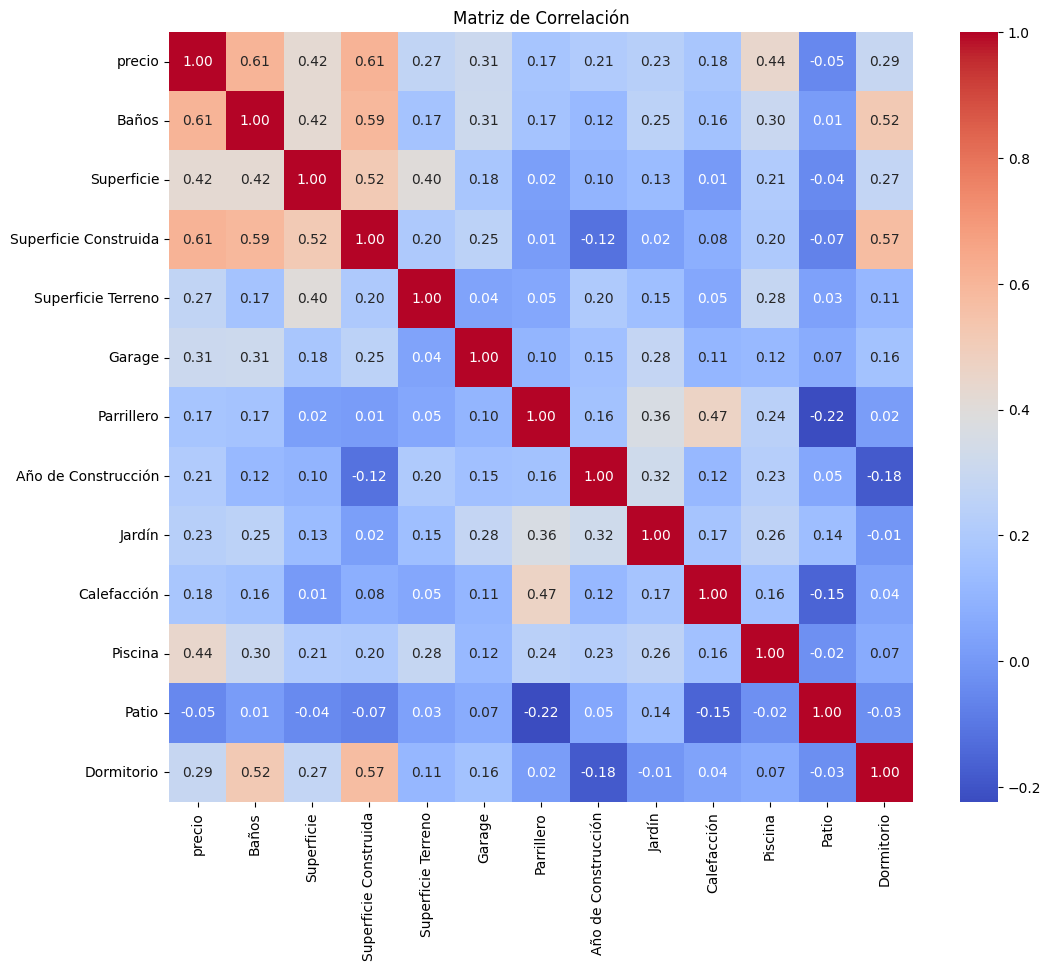

In [58]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Matriz de Correlación')
plt.show()

In [59]:
df.columns


Index(['url', 'precio', 'Baños', 'Superficie', 'Superficie Construida',
       'Superficie Terreno', 'Garage', 'Parrillero', 'Cocina',
       'Año de Construcción', 'Jardín', 'Calefacción', 'Piscina', 'Patio',
       'Dormitorio', 'barrio', 'municipio'],
      dtype='object')

In [60]:
df.columns.tolist()


['url',
 'precio',
 'Baños',
 'Superficie',
 'Superficie Construida',
 'Superficie Terreno',
 'Garage',
 'Parrillero',
 'Cocina',
 'Año de Construcción',
 'Jardín',
 'Calefacción',
 'Piscina',
 'Patio',
 'Dormitorio',
 'barrio',
 'municipio']

In [56]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 24.3 MB/s  0:00:00 eta 0:00:01


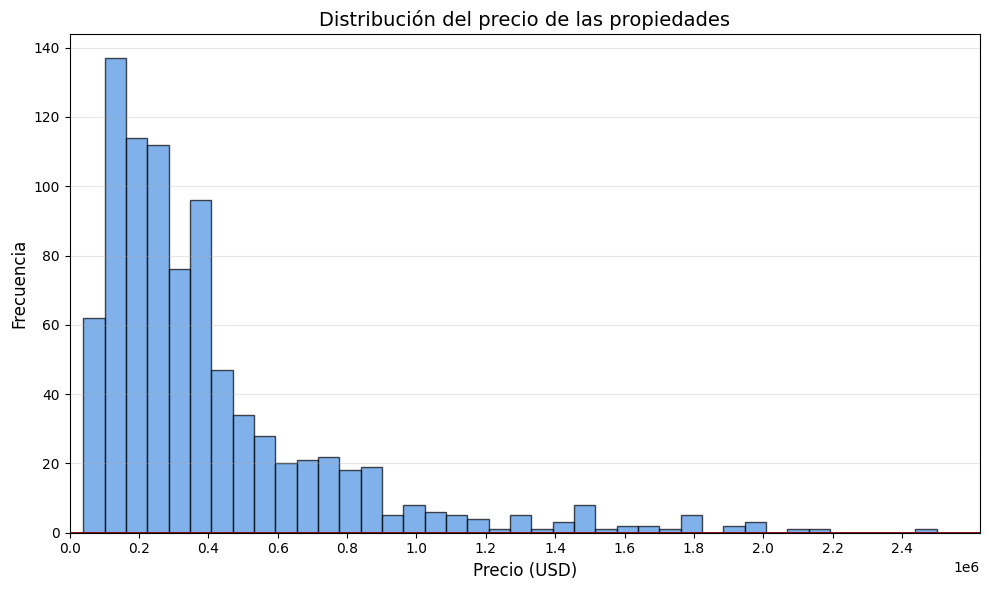

In [61]:
#Histograma

plt.figure(figsize=(10,6))

plt.hist(df["precio"], bins=40, alpha=0.7, edgecolor="black", color="#4A90E2")

df["precio"].plot(kind="kde", color="darkred", linewidth=2)

plt.xlabel("Precio (USD)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución del precio de las propiedades", fontsize=14)

plt.grid(axis="y", alpha=0.3)

plt.xlim(0, df["precio"].max()*1.05)  # Empieza en 0 y agrega 5% al máximo

plt.xticks(range(0, int(df["precio"].max())+1, 200000))

plt.tight_layout()
plt.show()


## Scatterplot de Superficie construida y Precio

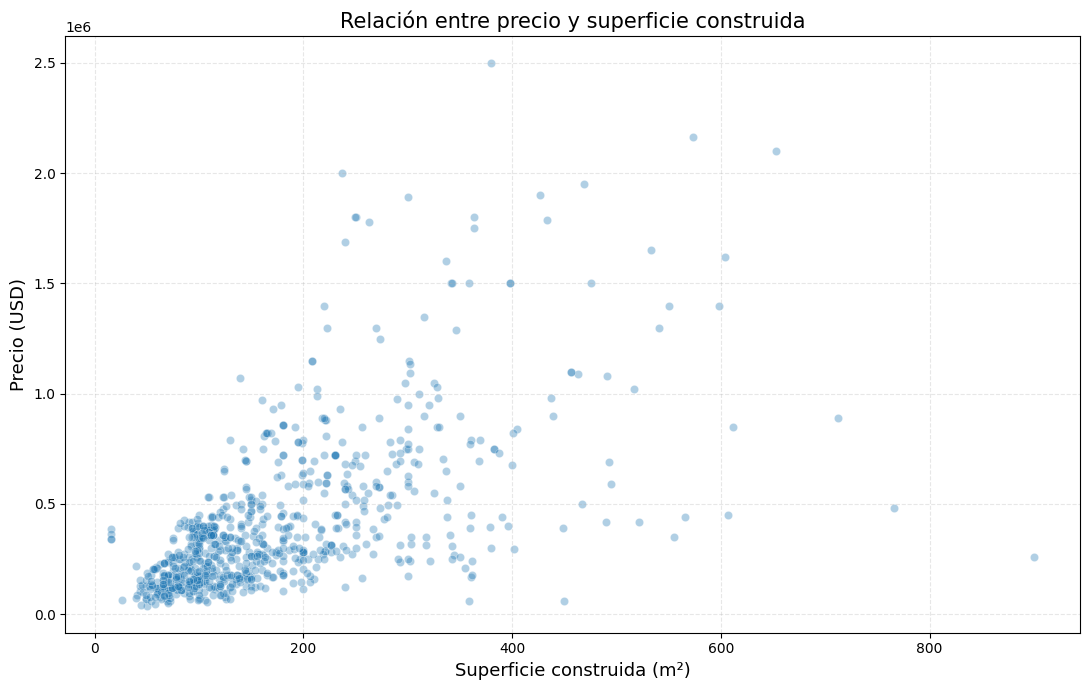

In [62]:
plt.figure(figsize=(11,7))

plt.scatter(
    df["Superficie Construida"],
    df["precio"],
    alpha=0.35,
    s=35,
    color="#1f77b4",
    edgecolor="white",
    linewidth=0.5
)

plt.xlabel("Superficie construida (m²)", fontsize=13)
plt.ylabel("Precio (USD)", fontsize=13)
plt.title("Relación entre precio y superficie construida", fontsize=15)

plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


## Boxplots

### Boxplots 1: precio, Baños, Superficie Construida, Superficie Terreno, Dormitorio, Garage 

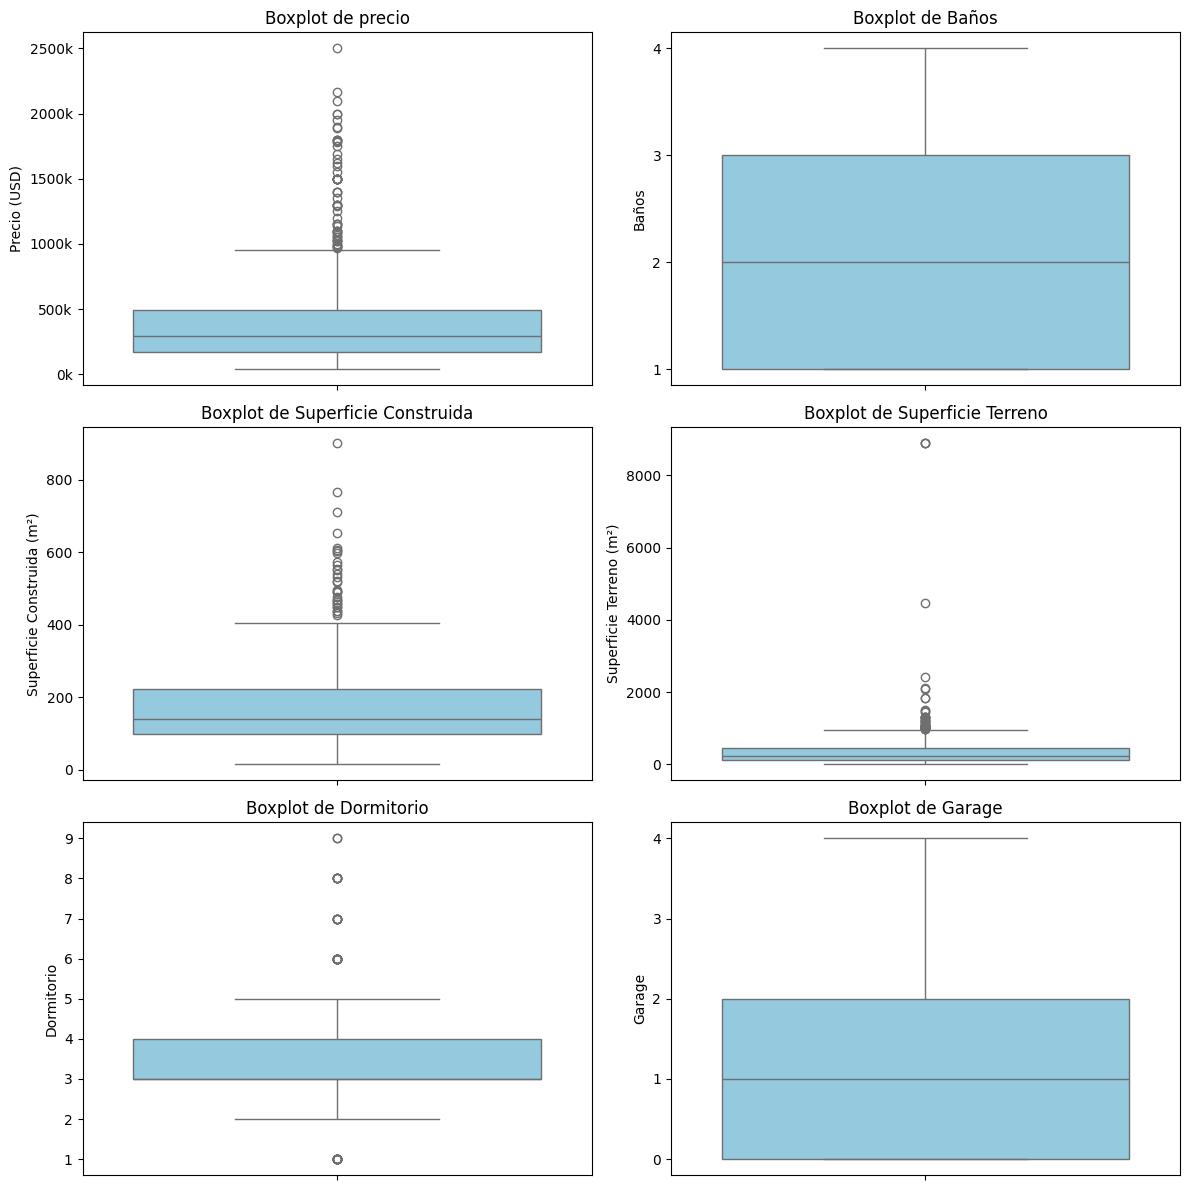

In [63]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator

# formatear valores en miles

def miles_formatter(x, pos):
    return f'{int(x/1000)}k'

# columnas a graficar

columnas_interes = ['precio', 'Baños', 'Superficie Construida',
                    'Superficie Terreno', 'Dormitorio', 'Garage']

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes = axes.flatten()

# Crear boxplots
for ax, col in zip(axes, columnas_interes):

    sns.boxplot(y=df[col], ax=ax, color="skyblue")
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel("")

    if col == 'precio':
        ax.set_ylabel("Precio (USD)")
        ax.yaxis.set_major_formatter(FuncFormatter(miles_formatter))

    elif col in ['Superficie Construida', 'Superficie Terreno']:
        ax.set_ylabel(f"{col} (m²)")

    else:
        ax.set_ylabel(col)

    if col in ['Baños', 'Garage']:
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


### Boxplot 2: Superficie terreno con y sin zoom (zoom a 1800 m2)

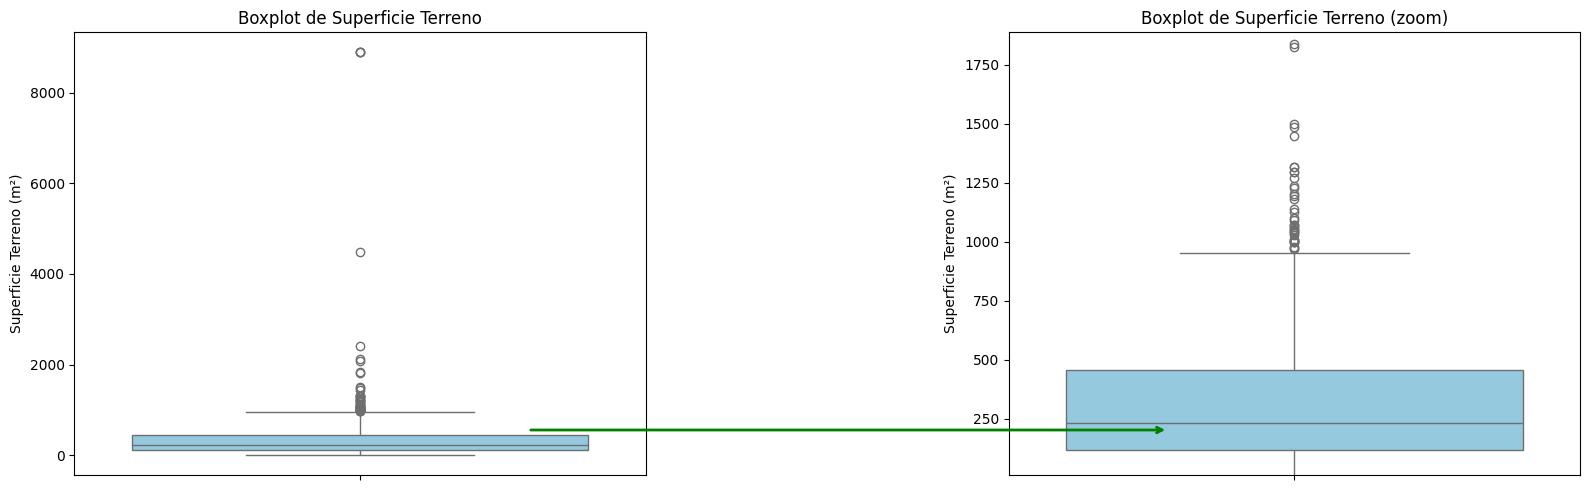

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.boxplot(y=df["Superficie Terreno"], color="skyblue", ax=axes[0])
axes[0].set_title("Boxplot de Superficie Terreno")
axes[0].set_ylabel("Superficie Terreno (m²)")

# Boxplot con zoom

q1 = df["Superficie Terreno"].quantile(0.01)
q99 = df["Superficie Terreno"].quantile(0.99)

sns.boxplot(y=df["Superficie Terreno"], color="skyblue", ax=axes[1])
axes[1].set_title("Boxplot de Superficie Terreno (zoom)")
axes[1].set_ylim(q1, q99)
axes[1].set_ylabel("Superficie Terreno (m²)")

# flecha verde

plt.annotate(
    "",
    xy=(0.73, 0.12),
    xytext=(0.33, 0.12),
    xycoords="figure fraction",
    textcoords="figure fraction",
    arrowprops=dict(arrowstyle="->", color="green", linewidth=2)
)

plt.tight_layout()
plt.show()

### Boxplot 3: Distribución de precio por municipio

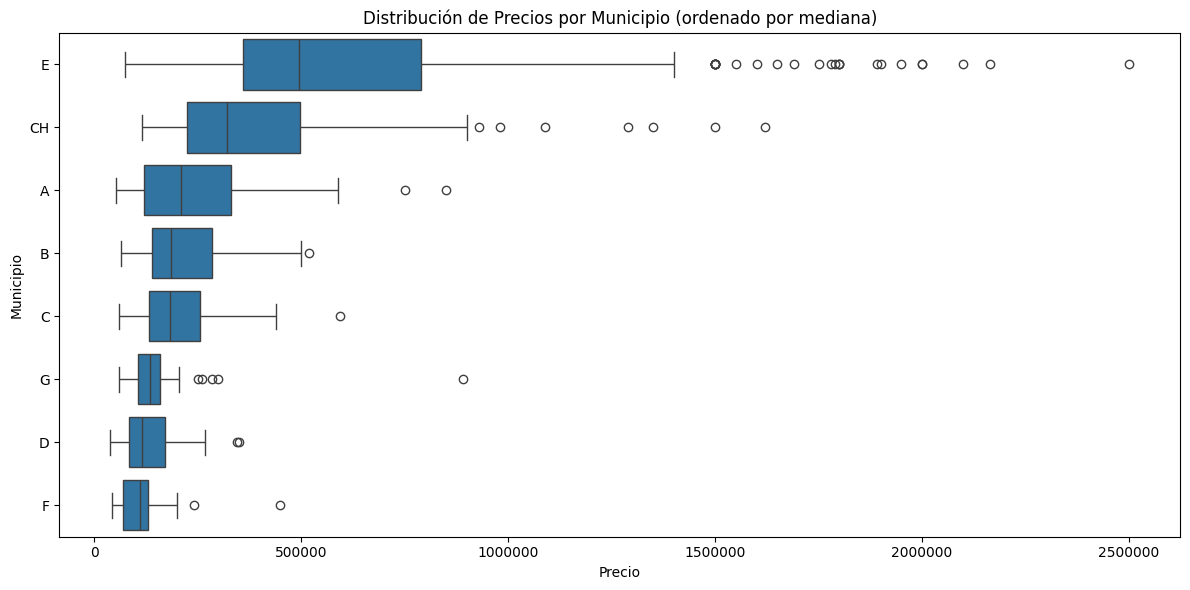

In [67]:
# en miles y no en notacion científica

pd.set_option('display.float_format', '{:.0f}'.format)

# Calcular mediana del precio por municipio

orden_municipios = (df.groupby("municipio")["precio"].median().sort_values(ascending=False).index)

# Crear boxplot ordenado por mediana

plt.figure(figsize=(12, 6))
sns.boxplot(
    x="precio",
    y="municipio",
    data=df,
    order=orden_municipios
)

plt.title("Distribución de Precios por Municipio (ordenado por mediana)")
plt.xlabel("Precio")
plt.ylabel("Municipio")

# Eliminar notación científica del eje X
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

In [60]:
df.groupby("municipio")["precio"].median().sort_values(ascending=False)

municipio
E     530000.0
CH    310000.0
B     188000.0
C     179000.0
A     165000.0
G     135500.0
D     115000.0
F     105000.0
Name: precio, dtype: float64

## Cantidad de datos por municipio

In [ ]:
cantidad_por_municipio = df['municipio'].value_counts()

print(cantidad_por_municipio)

municipio
E     693
CH    381
B     254
A     205
C     192
G      82
D      75
F      42
Name: count, dtype: int64


In [70]:
cantidad_por_municipio.sum()


np.int64(1924)

## Precio por m2

Calculamos nuevas columnas basado en superficie contruida y en superficie terreno.

In [61]:
len(df)

1924

In [62]:
# Calcular el precio por metro cuadrado basado en la superficie construida

df['precio_por_m2_construido'] = df['precio'] / df['Superficie Construida']

# Calcular el precio por metro cuadrado basado en la superficie del terreno

df['precio_por_m2_terreno'] = df['precio'] / df['Superficie Terreno']

df['precio_por_m2'] = df['precio'] / df['Superficie']

# Mostrar las nuevas columnas
print(df[['precio', 'Superficie Construida', 'precio_por_m2_construido', 'Superficie Terreno', 'precio_por_m2_terreno']])

        precio  Superficie Construida  precio_por_m2_construido  \
0     675000.0                  242.0               2789.256198   
1     298000.0                   94.0               3170.212766   
2     148000.0                   98.0               1510.204082   
3     625000.0                  234.0               2670.940171   
4     580000.0                  156.0               3717.948718   
...        ...                    ...                       ...   
1919  168000.0                  106.0               1584.905660   
1920  158700.0                  116.0               1368.103448   
1921  238000.0                  200.0               1190.000000   
1922  365000.0                  108.0               3379.629630   
1923  590000.0                  155.0               3806.451613   

      Superficie Terreno  precio_por_m2_terreno  
0                  268.0            2518.656716  
1                   10.0           29800.000000  
2                  131.0            1129.7709

In [63]:
len(df)

1924

In [64]:
# Filtrar las filas que tienen NaN en 'superficie_construida' o 'superficie_terreno'
filas_con_nan = df[df[['Superficie Construida', 'Superficie Terreno']].isnull().any(axis=1)]

# Mostrar las filas con NaN
print(filas_con_nan)

                                                    url     precio  Baños  \
5     https://www.casasymas.com.uy/propiedad/90237-c...   203400.0    2.0   
16    https://www.casasymas.com.uy/propiedad/226114-...    70000.0    1.0   
26    https://www.casasymas.com.uy/propiedad/225910-...   135000.0    1.0   
35    https://www.casasymas.com.uy/propiedad/123654-...   420000.0    2.0   
36    https://www.casasymas.com.uy/propiedad/196086-...   800000.0    2.0   
...                                                 ...        ...    ...   
1905  https://www.casasymas.com.uy/propiedad/150247-...  1020000.0    3.0   
1910  https://www.casasymas.com.uy/propiedad/156673-...   235000.0    3.0   
1913  https://www.casasymas.com.uy/propiedad/207153-...   267000.0    3.0   
1917  https://www.casasymas.com.uy/propiedad/137356-...   380000.0    1.0   
1921  https://www.casasymas.com.uy/propiedad/153963-...   238000.0    3.0   

      Superficie  Superficie Construida  Superficie Terreno  Garage  \
5   

## Precio promedio por municipio

In [65]:
# Calcular el precio promedio por municipio

precio_promedio_por_municipio = df.groupby('municipio')['precio'].mean()

# Calcular la cantidad de propiedades por municipio

cantidad_propiedades_por_municipio = df.groupby('municipio').size()

resultado_municipio = pd.DataFrame({
    'precio_promedio': precio_promedio_por_municipio,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

resultado_municipio = resultado_municipio.sort_values(by='precio_promedio', ascending=False)

print(resultado_municipio)

           precio_promedio  cantidad_propiedades
municipio                                       
E            607353.989899                   693
CH           385371.128609                   381
B            221640.826772                   254
A            209146.336585                   205
C            204728.072917                   192
G            154176.829268                    82
D            131859.973333                    75
F            120266.761905                    42


In [66]:
resultado_municipio['cantidad_propiedades'].sum()

np.int64(1924)

In [ ]:
len(df)

1924

In [68]:
df.groupby('municipio').size().sum()

np.int64(1924)

## Precio promedio por m2 construido por municipio

In [ ]:
# Calcular el precio promedio por m2 construido por municipio

precio_promedio_por_m2_construido = df.groupby('municipio')['precio_por_m2_construido'].mean()

# Calcular la cantidad de propiedades por municipio

cantidad_propiedades_por_municipio = df.groupby('municipio').size()

resultado_m2_municipio = pd.DataFrame({
    'precio_promedio_por_m2': precio_promedio_por_m2_construido,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

resultado_m2_municipio = resultado_m2_municipio.sort_values(by='precio_promedio_por_m2', ascending=False)

print(resultado_m2_municipio)

           precio_promedio_por_m2  cantidad_propiedades
municipio                                              
E                     3204.669415                   693
CH                    2422.693408                   381
A                     2302.215562                   205
C                     1555.754677                   192
B                     1440.730632                   254
D                     1318.648483                    75
G                     1243.299197                    82
F                     1161.472146                    42


## Precio promedio por m2 terreno por municipio

In [69]:
# Calcular el precio promedio por m2 terreno por municipio
precio_promedio_por_m2_terreno = df.groupby('municipio')['precio_por_m2_terreno'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

resultado_m2_terreno_municipio = pd.DataFrame({
    'precio_promedio_por_m2_terreno': precio_promedio_por_m2_terreno,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

resultado_m2_terreno_municipio = resultado_m2_terreno_municipio.sort_values(by='precio_promedio_por_m2_terreno', ascending=False)

print(resultado_m2_terreno_municipio)

           precio_promedio_por_m2_terreno  cantidad_propiedades
municipio                                                      
CH                            5549.383767                   381
C                             2414.043739                   192
E                             2330.565490                   693
B                             2263.497524                   254
A                             1686.069212                   205
D                             1331.289130                    75
G                              598.657659                    82
F                              520.644145                    42


## Precio promedio por m2 construido

In [70]:

precio_m2_construido = df.groupby('municipio')['precio_por_m2_construido'].mean()

precio_m2_terreno = df.groupby('municipio')['precio_por_m2_terreno'].mean()

tabla_municipios = pd.DataFrame({
    'Precio promedio por m2 construido': precio_m2_construido,
    'Precio promedio por m2 terreno': precio_m2_terreno
})

tabla_municipios = tabla_municipios.sort_values(
    by='Precio promedio por m2 construido',
    ascending=False
)

tabla_municipios = tabla_municipios.round(3)

print(tabla_municipios)


           Precio promedio por m2 construido  Precio promedio por m2 terreno
municipio                                                                   
E                                   3204.669                        2330.565
CH                                  2422.693                        5549.384
A                                   2302.216                        1686.069
C                                   1555.755                        2414.044
B                                   1440.731                        2263.498
D                                   1318.648                        1331.289
G                                   1243.299                         598.658
F                                   1161.472                         520.644


## Boxplots

### Boxplot 1: Distribución de precios por m2 construido por municipio

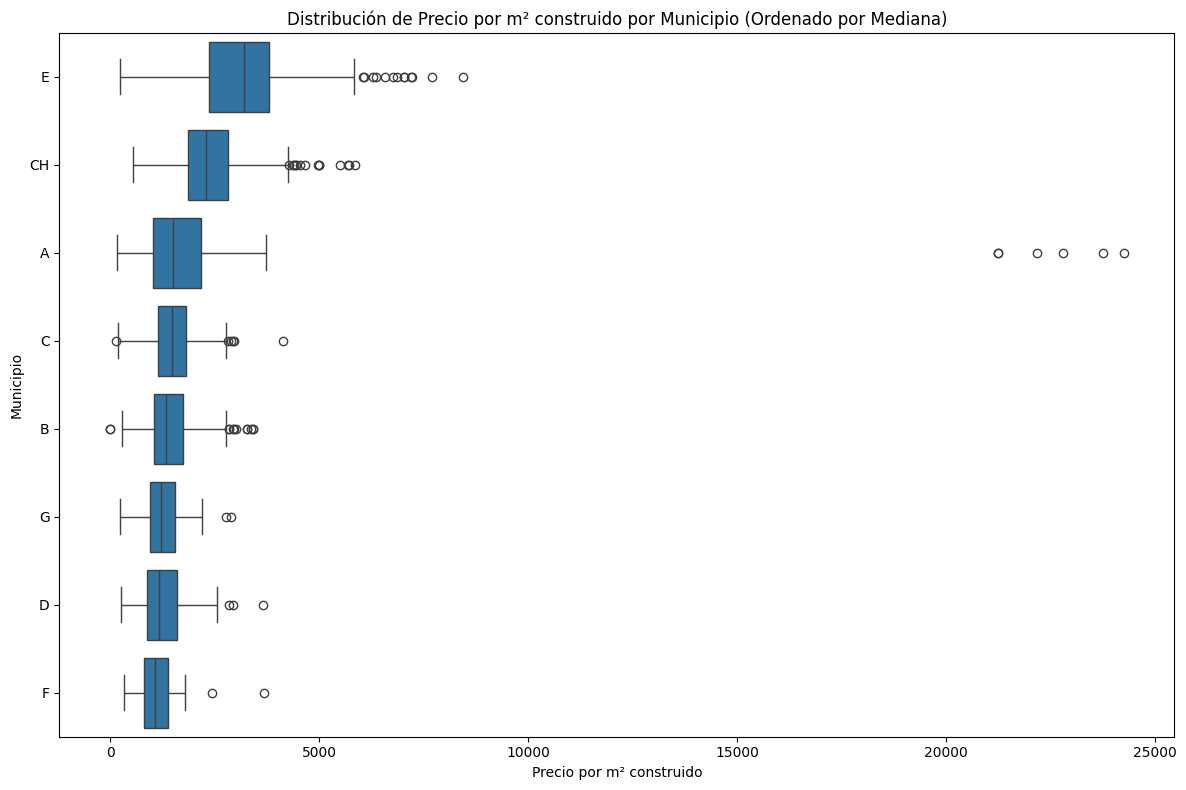

In [71]:
# Configurar pandas para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.0f}'.format)

mediana_por_municipio = df.groupby('municipio')['precio_por_m2_construido'].median().sort_values(ascending=False)

orden_municipios = mediana_por_municipio.index.tolist()

plt.figure(figsize=(12, 8))
sns.boxplot(y='municipio', x='precio_por_m2_construido', data=df, order=orden_municipios)

plt.title('Distribución de Precio por m² construido por Municipio (Ordenado por Mediana)')
plt.xlabel('Precio por m² construido')
plt.ylabel('Municipio')

plt.tight_layout()

plt.show()

In [72]:
df['precio_por_m2_construido'].isna().sum()


np.int64(156)

## Análisis de outliers en Municipio A

In [73]:
# Filtrar solo el municipio A

df_municipio_a = df[df['municipio'] == 'A']

# Calcular Q1, Q3 e IQR para identificar outliers

Q1 = df_municipio_a['precio_por_m2_construido'].quantile(0.25)
Q3 = df_municipio_a['precio_por_m2_construido'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_municipio_a[
    (df_municipio_a['precio_por_m2_construido'] < lower_bound) |
    (df_municipio_a['precio_por_m2_construido'] > upper_bound)
]

# Ordenar por precio_por_m2_construido de mayor a menor para ver los outliers superiores

outliers_sorted = outliers.sort_values('precio_por_m2_construido', ascending=False)

print(f"Total de outliers en municipio A: {len(outliers)}")
print("\nLos outliers con mayor precio por m²:")
print(outliers_sorted[['url', 'precio_por_m2_construido', 'precio']].head(4))

print("\nURLs de los 4 outliers principales:")
for idx, url in enumerate(outliers_sorted['url'].head(4), 1):
    print(f"{idx}. {url}")

Total de outliers en municipio A: 6

Los outliers con mayor precio por m²:
                                                    url  \
1102  https://www.casasymas.com.uy/propiedad/137357-...   
1917  https://www.casasymas.com.uy/propiedad/137356-...   
1155  https://www.casasymas.com.uy/propiedad/137355-...   
1769  https://www.casasymas.com.uy/propiedad/137353-...   

      precio_por_m2_construido  precio  
1102                     24250  388000  
1917                     23750  380000  
1155                     22812  365000  
1769                     22188  355000  

URLs de los 4 outliers principales:
1. https://www.casasymas.com.uy/propiedad/137357-casa-de-tres-dormitorios-en-venta-en-prado-009
2. https://www.casasymas.com.uy/propiedad/137356-casa-de-tres-dormitorios-en-venta-en-prado-010
3. https://www.casasymas.com.uy/propiedad/137355-casa-de-tres-dormitorios-en-venta-en-prado-014
4. https://www.casasymas.com.uy/propiedad/137353-casa-de-tres-dormitorios-en-venta-en-prado-011


## Sacar Outliers dónde precio_por_m2_construido > 10,000

In [74]:
len(df)
print(f"Filas df: {len(df)}")

# Ver cuántas filas tienen precio_por_m2_construido > 10000

rows_to_remove = df[df['precio_por_m2_construido'] > 10000]
print(f"Filas a eliminar (precio_por_m2_construido > 10000): {len(rows_to_remove)}")

# Eliminar las filas donde precio_por_m2_construido > 10000

df = df[df['precio_por_m2_construido'] <= 10000]

print(f"Filas restantes después del filtrado: {len(df)}")

Filas df: 1924
Filas a eliminar (precio_por_m2_construido > 10000): 6
Filas restantes después del filtrado: 1762


In [75]:
df['precio_por_m2_terreno'].isna().sum()


np.int64(311)

In [76]:
len(df)
print(f"Filas df: {len(df)}")

# Ver cuántas filas tienen precio_por_m2_terreno > 10000

rows_to_remove = df[df['precio_por_m2_terreno'] > 10000]
print(f"Filas a eliminar (precio_por_m2_terreno > 10000): {len(rows_to_remove)}")

# Eliminar las filas donde precio_por_m2_terreno > 10000

df = df[df['precio_por_m2_terreno'] <= 10000]

print(f"Filas restantes después del filtrado: {len(df)}")

Filas df: 1762
Filas a eliminar (precio_por_m2_terreno > 10000): 46
Filas restantes después del filtrado: 1405


In [77]:
# nuevo length del dataset

len(df)

1405

## Sacar de nuevo el ranking para ver como quedo

In [79]:
precio_promedio_por_m2_construido = df.groupby('municipio')['precio_por_m2_construido'].mean()

precio_promedio_por_m2_terreno = df.groupby('municipio')['precio_por_m2_terreno'].mean()

cantidad_propiedades_por_municipio = df.groupby('municipio').size()

resultado_m2_municipio = pd.DataFrame({
    'precio_promedio_por_m2_construido': precio_promedio_por_m2_construido,
    'precio_promedio_por_m2_terreno': precio_promedio_por_m2_terreno,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

resultado_m2_municipio = resultado_m2_municipio.sort_values(
    by='precio_promedio_por_m2_construido',
    ascending=False
)

resultado_m2_municipio = resultado_m2_municipio.round(0)

print("Ranking de precio promedio por m² construido y terreno por municipio:")
resultado_m2_municipio.head()

Ranking de precio promedio por m² construido y terreno por municipio:


,precio_promedio_por_m2_construido,precio_promedio_por_m2_terreno,cantidad_propiedades
municipio,,,
E,3171,1850,548
CH,2426,2440,268
A,1663,1138,138
C,1552,1808,143
B,1430,1727,159


In [80]:
print("Total de propiedades:", resultado_m2_municipio['cantidad_propiedades'].sum())


Total de propiedades: 1405


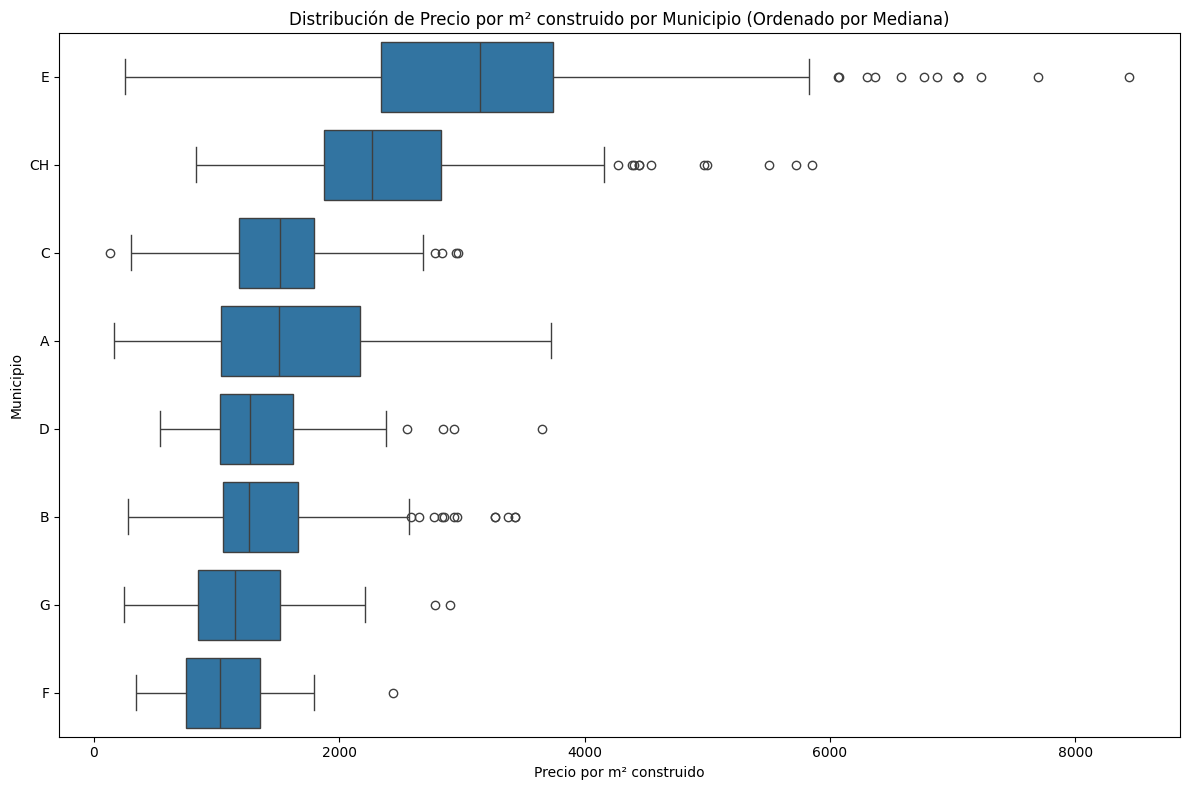

In [81]:
# Configurar pandas para mostrar números en formato decimal

pd.set_option('display.float_format', '{:.0f}'.format)

mediana_por_municipio = df.groupby('municipio')['precio_por_m2_construido'].median().sort_values(ascending=False)

orden_municipios = mediana_por_municipio.index.tolist()

plt.figure(figsize=(12, 8))
sns.boxplot(y='municipio', x='precio_por_m2_construido', data=df, order=orden_municipios)

plt.title('Distribución de Precio por m² construido por Municipio (Ordenado por Mediana)')
plt.xlabel('Precio por m² construido')
plt.ylabel('Municipio')

plt.tight_layout()

plt.show()

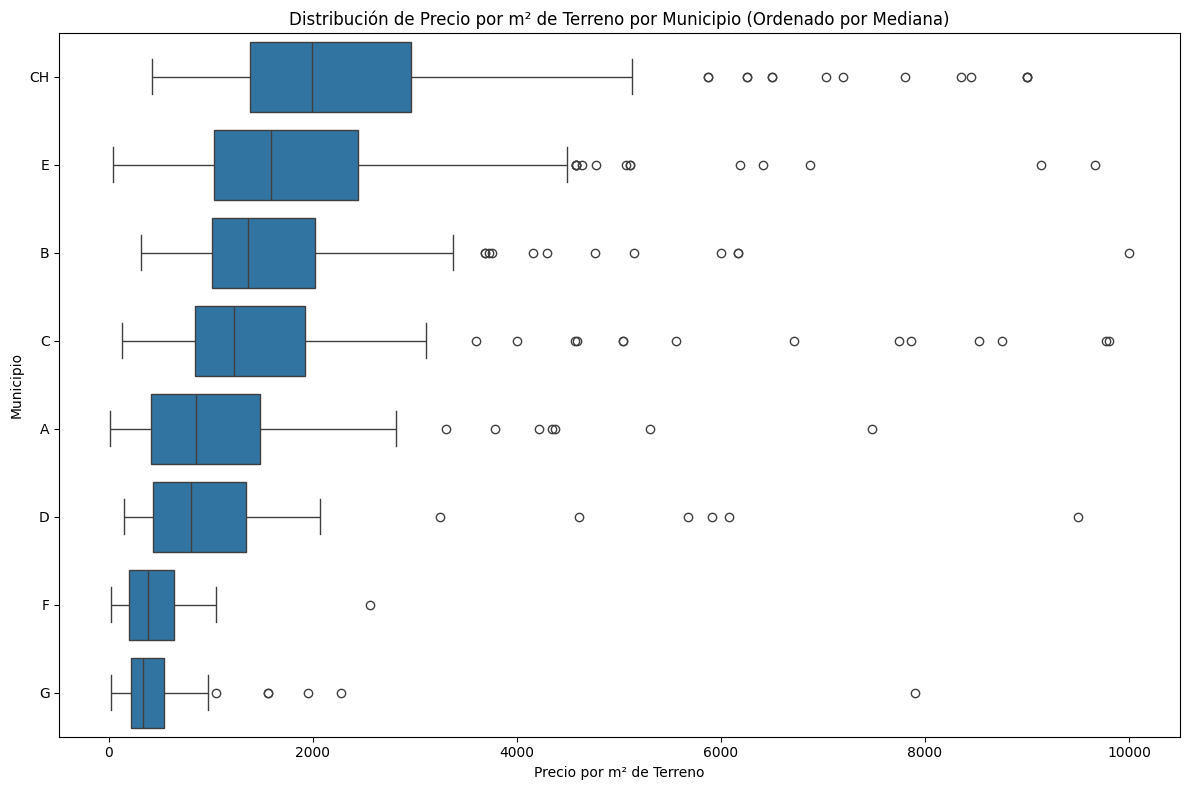

In [96]:
# Configurar pandas para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_terreno'

# Calcular la mediana por municipio para ordenar
mediana_por_municipio = df.groupby('municipio')['precio_por_m2_terreno'].median().sort_values(ascending=False)

# Obtener el orden de los municipios (de mayor a menor mediana)
orden_municipios = mediana_por_municipio.index.tolist()

# Crear el boxplot con municipios ordenados en el eje Y por mediana
plt.figure(figsize=(12, 8))
sns.boxplot(y='municipio', x='precio_por_m2_terreno', data=df, order=orden_municipios)

# Añadir título y etiquetas
plt.title('Distribución de Precio por m² de Terreno por Municipio (Ordenado por Mediana)')
plt.xlabel('Precio por m² de Terreno')
plt.ylabel('Municipio')

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## GRAFICO PRECIO M2 POR MUNICIPIO

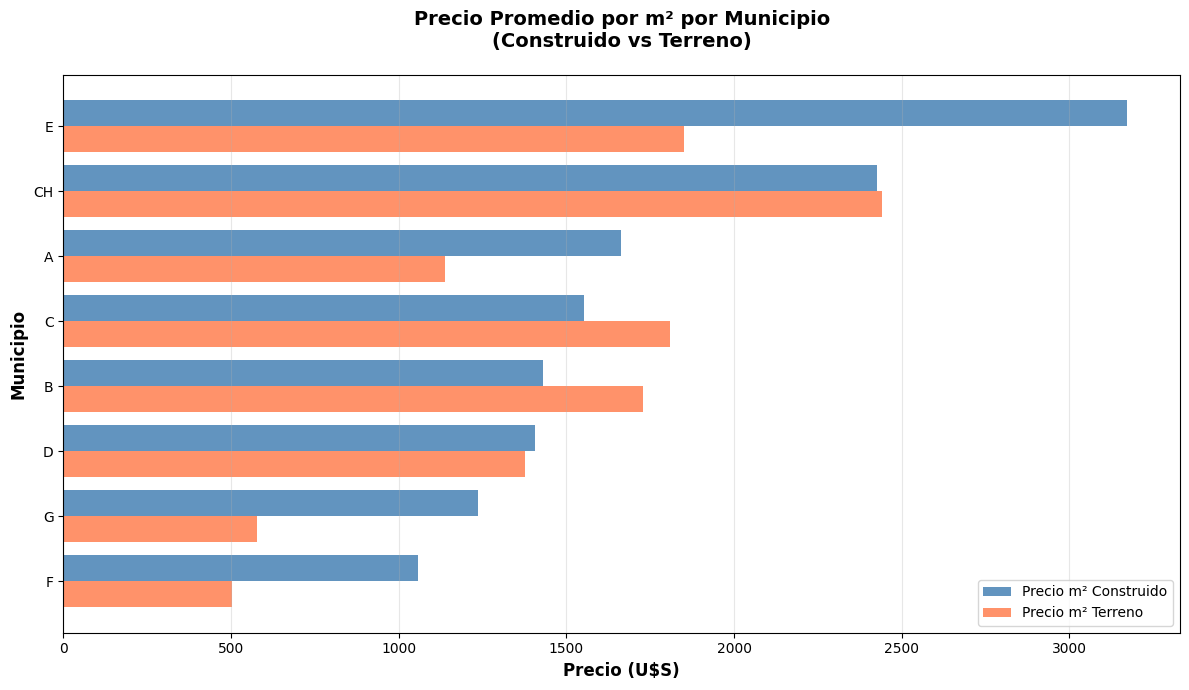

In [82]:
# Calcular promedios por municipio

precio_m2_construido = df.groupby('municipio')['precio_por_m2_construido'].mean()
precio_m2_terreno = df.groupby('municipio')['precio_por_m2_terreno'].mean()

# Ordenar por precio m² construido

orden = precio_m2_construido.sort_values(ascending=False).index
precio_m2_construido = precio_m2_construido.loc[orden]
precio_m2_terreno = precio_m2_terreno.loc[orden]

fig, ax = plt.subplots(figsize=(12, 7))

y = np.arange(len(precio_m2_construido.index))

ax.barh(
    y - 0.2,
    precio_m2_construido.values,
    height=0.4,
    label='Precio m² Construido',
    color='steelblue',
    alpha=0.85
)

ax.barh(
    y + 0.2,
    precio_m2_terreno.values,
    height=0.4,
    label='Precio m² Terreno',
    color='coral',
    alpha=0.85
)

ax.invert_yaxis()

ax.set_yticks(y)
ax.set_yticklabels(precio_m2_construido.index)
ax.set_xlabel('Precio (U$S)', fontsize=12, fontweight='bold')
ax.set_ylabel('Municipio', fontsize=12, fontweight='bold')

ax.set_title('Precio Promedio por m² por Municipio\n(Construido vs Terreno)',
             fontsize=14, fontweight='bold', pad=20)

ax.legend(loc='lower right', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Lo mismo por barrios

In [83]:
# Calcular el precio promedio por barrio

precio_promedio_por_barrios = df.groupby('barrio')['precio'].mean()

# Calcular la cantidad de propiedades por barrio

cantidad_propiedades_por_barrio = df.groupby('barrio').size()

resultado = pd.DataFrame({
    'precio_promedio': precio_promedio_por_barrios,
    'cantidad_propiedades': cantidad_propiedades_por_barrio
})

resultado = resultado.sort_values(by='precio_promedio', ascending=False)

print(resultado.round(0).astype(int))

                        precio_promedio  cantidad_propiedades
barrio                                                       
san-nicolas                     1145682                    26
carrasco                         762404                   245
punta-carretas                   628447                    38
punta-gorda                      627700                    70
pocitos                          474038                    79
...                                 ...                   ...
nuevo-paris                       96429                     7
cerrito                           95000                     2
conciliacion                      84583                     6
flor-de-maronas                   82151                     6
jardines-del-hipodromo            76500                     2

[64 rows x 2 columns]


In [84]:
print("Total de propiedades:", resultado['cantidad_propiedades'].sum())


Total de propiedades: 1405


In [85]:
# Agrupar por barrio y municipio

tabla = (
    df.groupby(['barrio', 'municipio'])
      .agg(
          precio_promedio=('precio', 'mean'),
          cantidad_propiedades=('precio', 'size')
      )
      .reset_index()
)

# Ordenar por cantidad de propiedades

tabla = tabla.sort_values(by='cantidad_propiedades', ascending=False)

top10 = tabla.head(10)

# Reordenar columnas
top10 = top10[['barrio', 'municipio', 'precio_promedio', 'cantidad_propiedades']]

top10['precio_promedio'] = top10['precio_promedio'].round(0)

print(top10)

            barrio municipio  precio_promedio  cantidad_propiedades
11        carrasco         E           762404                   245
12  carrasco-norte         E           450868                   114
48         pocitos        CH           474038                    79
49           prado         A           302197                    71
51     punta-gorda         E           627700                    70
31          malvin         E           381213                    70
25   la-blanqueada        CH           259172                    58
9            buceo        CH           302564                    56
8   brazo-oriental         C           224350                    40
50  punta-carretas        CH           628447                    38


In [103]:
sorted(df["barrio"].unique())


['abayuba',
 'aguada',
 'aires-puros',
 'atahualpa',
 'barrio-sur',
 'bella-vista',
 'belvedere',
 'bolivar',
 'brazo-oriental',
 'buceo',
 'capurro',
 'carrasco',
 'carrasco-norte',
 'centro',
 'cerrito',
 'cerro',
 'ciudad-vieja',
 'colon',
 'conciliacion',
 'cordon',
 'flor-de-maronas',
 'goes',
 'ituzaingo',
 'jacinto-vera',
 'jardines-del-hipodromo',
 'la-blanqueada',
 'la-comercial',
 'la-figurita',
 'la-teja',
 'larranaga',
 'lezica',
 'malvin',
 'malvin-norte',
 'manga',
 'maronas',
 'mercado-modelo',
 'nuevo-paris',
 'pajas-blancas',
 'palermo',
 'parque-batlle',
 'parque-rivera',
 'parque-rodo',
 'paso-de-la-arena',
 'paso-de-las-duranas',
 'paso-molino',
 'penarol',
 'perez-castellanos',
 'piedras-blancas',
 'pocitos',
 'prado',
 'punta-carretas',
 'punta-gorda',
 'punta-rieles',
 'reducto',
 'san-nicolas',
 'sayago',
 'tres-cruces',
 'tres-ombues',
 'union',
 'victoria',
 'villa-dolores',
 'villa-espanola',
 'villa-garcia',
 'villa-munoz']

## MAPA 

In [ ]:
!pip install geopandas

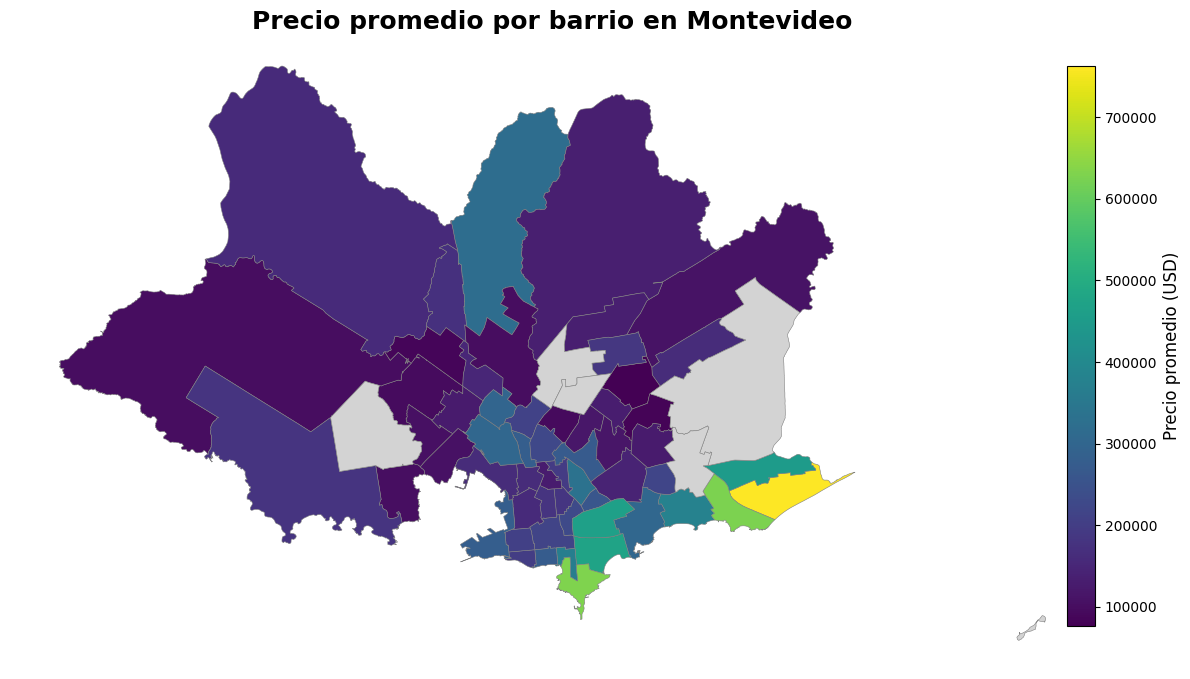


Barrios sin datos (no presentes en el dataset original):
            NOMBARRIOINE
6    BAÑADOS DE CARRASCO
13  LA PALOMA, TOMKINSON
20             CASAVALLE
22           LAS ACACIAS
24                   N/A
54          LAS CANTERAS


In [86]:
import geopandas as gpd

try:
    df
except NameError:
    raise ValueError("ERROR: no existe el DataFrame 'df'. Debe venir de tu EDA.")

# Precio numérico

df['precio'] = pd.to_numeric(df['precio'], errors='coerce')
df_precios = df.dropna(subset=['barrio', 'precio'])

# Precio promedio y cantidad por barrio

precio_promedio_por_barrios = df_precios.groupby('barrio')['precio'].mean()
cantidad_propiedades_por_barrio = df_precios.groupby('barrio').size()

res_barrios = pd.DataFrame({
    'barrio': precio_promedio_por_barrios.index,
    'precio_promedio': precio_promedio_por_barrios.values,
    'cantidad_propiedades': cantidad_propiedades_por_barrio.values
})

equivalencias = {
    "abayuba": "COLON SURESTE, ABAYUBA",
    "aguada": "AGUADA",
    "aires-puros": "AIRES PUROS",
    "atahualpa": "ATAHUALPA",
    "barrio-sur": "BARRIO SUR",
    "bella-vista": "CAPURRO, BELLA VISTA",
    "belvedere": "BELVEDERE",
    "bolivar": "MERCADO MODELO, BOLIVAR",
    "brazo-oriental": "BRAZO ORIENTAL",
    "buceo": "BUCEO",
    "capurro": "CAPURRO, BELLA VISTA",
    "carrasco": "CARRASCO",
    "carrasco-norte": "CARRASCO NORTE",
    "centro": "CENTRO",
    "cerrito": "CERRITO",
    "cerro": "CERRO",
    "ciudad-vieja": "CIUDAD VIEJA",
    "colon": "COLON CENTRO Y NOROESTE",
    "conciliacion": "CONCILIACION",
    "cordon": "CORDON",
    "flor-de-maronas": "FLOR DE MAROÑAS",
    "goes": "GOES",
    "ituzaingo": "ITUZAINGO",
    "jacinto-vera": "JACINTO VERA",
    "jardines-del-hipodromo": "JARDINES DEL HIPODROMO",
    "la-blanqueada": "LA BLANQUEADA",
    "la-comercial": "LA COMERCIAL",
    "la-figurita": "LA FIGURITA",
    "la-teja": "LA TEJA",
    "larranaga": "LARRAÑAGA",
    "lezica": "LEZICA, MELILLA",
    "malvin": "MALVIN",
    "malvin-norte": "MALVIN NORTE",
    "manga": "MANGA, TOLEDO CHICO",
    "maronas": "MAROÑAS, PARQUE GUARANI",
    "mercado-modelo": "MERCADO MODELO, BOLIVAR",
    "nuevo-paris": "NUEVO PARIS",
    "pajas-blancas": "CASABO, PAJAS BLANCAS",
    "palermo": "PALERMO",
    "parque-batlle": "PQUE. BATLLE, V. DOLORES",
    "parque-rivera": "PQUE. RIVERA",
    "parque-rodo": "PARQUE RODO",
    "paso-de-la-arena": "PASO DE LA ARENA",
    "paso-de-las-duranas": "PASO DE LAS DURANAS",
    "paso-molino": "PRADO, NUEVA SAVONA",
    "penarol": "PEÑAROL, LAVALLEJA",
    "perez-castellanos": "CASTRO, P. CASTELLANOS",
    "piedras-blancas": "PIEDRAS BLANCAS",
    "pocitos": "POCITOS",
    "prado": "PRADO, NUEVA SAVONA",
    "punta-carretas": "PUNTA CARRETAS",
    "punta-gorda": "PUNTA GORDA",
    "punta-rieles": "PTA. RIELES, BELLA ITALIA",
    "reducto": "REDUCTO",
    "san-nicolas": "SAN NICOLAS",
    "sayago": "SAYAGO",
    "tres-cruces": "TRES CRUCES",
    "tres-ombues": "TRES OMBUES, VICTORIA",
    "union": "UNION",
    "victoria": "TRES OMBUES, VICTORIA",
    "villa-dolores": "PQUE. BATLLE, V. DOLORES",
    "villa-espanola": "VILLA ESPAÑOLA",
    "villa-garcia": "VILLA GARCIA, MANGA RUR.",
    "villa-munoz": "VILLA MUÑOZ, RETIRO"
}

equiv_upper = {k.upper(): v.upper() for k, v in equivalencias.items()}

# normalizar nombres

res_barrios['BARRIO_UP'] = res_barrios['barrio'].str.upper().str.strip()
res_barrios['BARRIO_OFICIAL'] = res_barrios['BARRIO_UP'].replace(equiv_upper)

# cargar file .gpkg con barrios

barrios = gpd.read_file("barrios_mvd_23_pg.gpkg")
barrios['NOMBARRIOINE_UP'] = barrios['NOMBARRIOINE'].str.upper().str.strip()

# mergeamos mapa + precio

mapa_precios = barrios.merge(
    res_barrios,
    left_on='NOMBARRIOINE_UP',
    right_on='BARRIO_OFICIAL',
    how='left'
)

# AJUSTE: COPIAR PRECIO DE "MANGA, TOLEDO CHICO" A "MANGA"

mask_manga_tc = mapa_precios['NOMBARRIOINE_UP'] == 'MANGA, TOLEDO CHICO'
mask_manga_simple = mapa_precios['NOMBARRIOINE_UP'] == 'MANGA'

if mapa_precios.loc[mask_manga_tc, 'precio_promedio'].notna().any():
    valor_manga = mapa_precios.loc[mask_manga_tc, 'precio_promedio'].iloc[0]
    mapa_precios.loc[mask_manga_simple, 'precio_promedio'] = valor_manga

fig, ax = plt.subplots(figsize=(14, 14))

mapa_precios_plot = mapa_precios.plot(
    column='precio_promedio',
    cmap='viridis',
    linewidth=0.4,
    edgecolor='gray',
    ax=ax,
    legend=False,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "gray",
        "label": "Sin datos"
    }
)

ax.set_title("Precio promedio por barrio en Montevideo", fontsize=18, weight='bold')
ax.axis('off')

cbar_ax = fig.add_axes([0.88, 0.30, 0.02, 0.40])

sm = plt.cm.ScalarMappable(
    cmap='viridis',
    norm=plt.Normalize(
        vmin=mapa_precios['precio_promedio'].min(),
        vmax=mapa_precios['precio_promedio'].max()
    )
)
sm._A = []

cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Precio promedio (USD)", fontsize=12)

plt.show()

# barrios sin datos

sin_datos = mapa_precios[mapa_precios['precio_promedio'].isna()][['NOMBARRIOINE']]
print("\nBarrios sin datos (no presentes en el dataset original):")
print(sin_datos)


In [87]:
pd.set_option('display.float_format', '{:.0f}'.format)

# Calcular el precio promedio por m2 construido por barrio

precio_promedio_por_m2_construido_barrios = df.groupby('barrio')['precio_por_m2_construido'].mean()

precio_promedio_por_m2_construido_barrios = precio_promedio_por_m2_construido_barrios.sort_values(ascending=False)

print(precio_promedio_por_m2_construido_barrios)

barrio
san-nicolas              5268
carrasco                 3424
carrasco-norte           3216
villa-dolores            2951
pocitos                  2652
                         ... 
pajas-blancas             833
flor-de-maronas           807
tres-ombues               704
jardines-del-hipodromo    432
villa-garcia              410
Name: precio_por_m2_construido, Length: 64, dtype: float64


In [111]:
# Configurar pandas para mostrar números sin decimales
pd.set_option('display.float_format', '{:.0f}'.format)

# Calcular el precio promedio por metro cuadrado de terreno por barrio
precio_promedio_por_m2_terreno_barrios = df.groupby('barrio')['precio_por_m2_terreno'].mean()

# Ordenar de mayor a menor
precio_promedio_por_m2_terreno_barrios = precio_promedio_por_m2_terreno_barrios.sort_values(ascending=False)

# Mostrar el precio promedio por metro cuadrado de terreno por barrio
print(precio_promedio_por_m2_terreno_barrios)

barrio
punta-carretas           3599
pocitos                  2722
bella-vista              2597
parque-batlle            2517
larranaga                2489
                         ... 
villa-garcia              219
pajas-blancas             205
tres-ombues               176
jardines-del-hipodromo    164
punta-rieles              124
Name: precio_por_m2_terreno, Length: 64, dtype: float64


## Precio promedio por m2 construido, m2 terreno

In [88]:
# Configurar pandas para mostrar todos los datos sin cortar

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.0f}'.format)

# Crear la tabla directamente con groupby y agg
tabla_completa = df.groupby('barrio').agg({
    'precio_por_m2_construido': 'mean',
    'precio_por_m2_terreno': 'mean',
    'url': 'count'
}).rename(columns={'url': 'cantidad_propiedades'})

tabla_completa = tabla_completa.sort_values(by='precio_por_m2_construido', ascending=False)

df_tabla_barrios = tabla_completa.copy()

df_tabla_barrios.head(20)

,precio_por_m2_construido,precio_por_m2_terreno,cantidad_propiedades
barrio,,,
san-nicolas,5268,2239,26
carrasco,3424,1996,245
carrasco-norte,3216,1923,114
villa-dolores,2951,1181,2
pocitos,2652,2722,79
punta-gorda,2617,1649,70
punta-carretas,2597,3599,38
buceo,2549,1944,56
malvin,2422,1597,70


In [89]:
# Agrupación por barrio y municipio
tabla = (
    df.groupby(['barrio', 'municipio'])
      .agg(
          precio_m2_construido=('precio_por_m2_construido', 'mean'),
          precio_m2_terreno=('precio_por_m2_terreno', 'mean'),
          cantidad_propiedades=('url', 'count')
      )
      .reset_index()
)

tabla = tabla.sort_values(by='cantidad_propiedades', ascending=False)

top10_barrios = tabla.head(10)

top10_barrios['precio_m2_construido'] = top10_barrios['precio_m2_construido'].round(0)
top10_barrios['precio_m2_terreno'] = top10_barrios['precio_m2_terreno'].round(0)

top10_barrios = top10_barrios[
    ['barrio', 'municipio',
     'precio_m2_construido',
     'precio_m2_terreno',
     'cantidad_propiedades']
]

print(top10_barrios)


            barrio municipio  precio_m2_construido  precio_m2_terreno  \
11        carrasco         E                  3424               1996   
12  carrasco-norte         E                  3216               1923   
48         pocitos        CH                  2652               2722   
49           prado         A                  2121               1614   
51     punta-gorda         E                  2617               1649   
31          malvin         E                  2422               1597   
25   la-blanqueada        CH                  1955               1774   
9            buceo        CH                  2549               1944   
8   brazo-oriental         C                  1782               2214   
50  punta-carretas        CH                  2597               3599   

    cantidad_propiedades  
11                   245  
12                   114  
48                    79  
49                    71  
51                    70  
31                    70  
25     

/var/folders/jb/mrvrxpj536q3c07jmkq2z00c0000gn/T/ipykernel_73523/557480726.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_barrios['precio_m2_construido'] = top10_barrios['precio_m2_construido'].round(0)
/var/folders/jb/mrvrxpj536q3c07jmkq2z00c0000gn/T/ipykernel_73523/557480726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_barrios['precio_m2_terreno'] = top10_barrios['precio_m2_terreno'].round(0)


## PRECIO POR M2 POR BARRIO



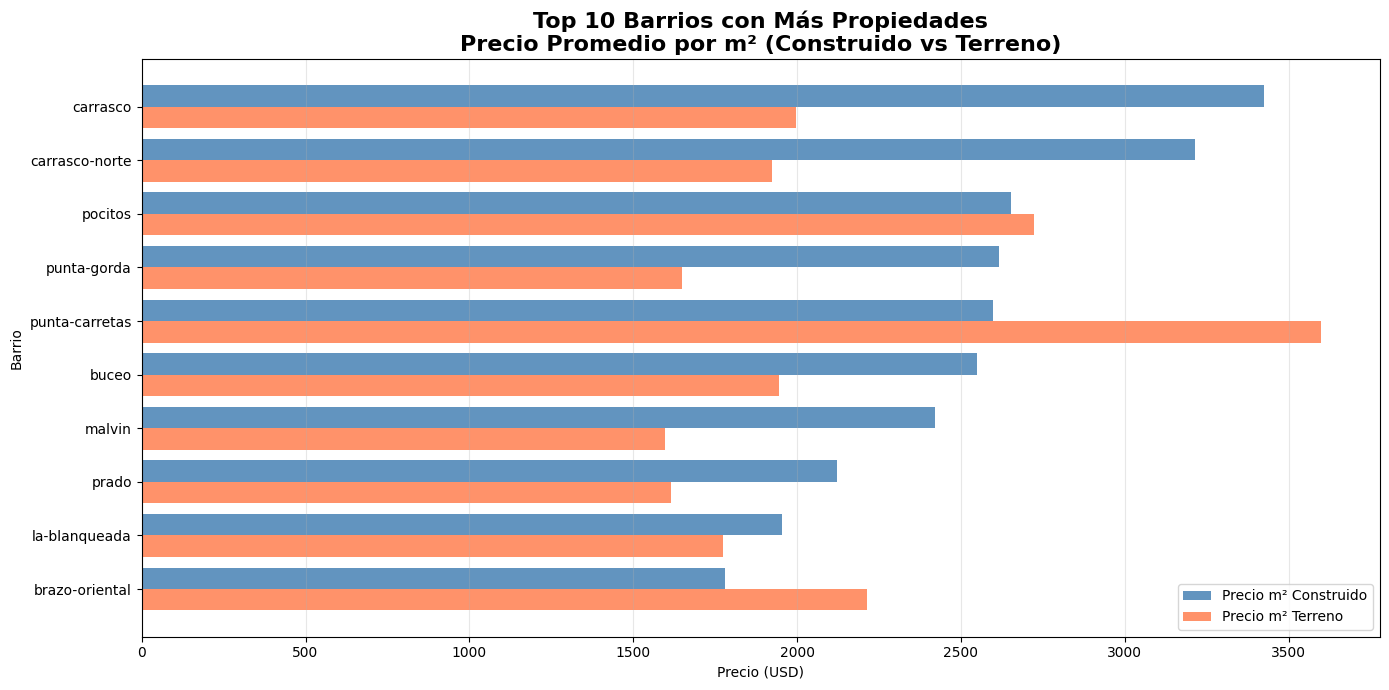

In [90]:
# Encontrar los 10 barrios con más propiedades
top10_barrios = (
    df['barrio']
    .value_counts()
    .head(10)
    .index
)

df_top10 = df[df['barrio'].isin(top10_barrios)]

precio_m2_construido = df_top10.groupby('barrio')['precio_por_m2_construido'].mean()
precio_m2_terreno = df_top10.groupby('barrio')['precio_por_m2_terreno'].mean()

orden = precio_m2_construido.sort_values(ascending=False).index

precio_m2_construido = precio_m2_construido.loc[orden]
precio_m2_terreno = precio_m2_terreno.loc[orden]

fig, ax = plt.subplots(figsize=(14, 7))

y = np.arange(len(orden))

ax.barh(
    y - 0.2,
    precio_m2_construido.values,
    height=0.4,
    label='Precio m² Construido',
    color='steelblue',
    alpha=0.85
)

ax.barh(
    y + 0.2,
    precio_m2_terreno.values,
    height=0.4,
    label='Precio m² Terreno',
    color='coral',
    alpha=0.85
)

ax.invert_yaxis()

ax.set_yticks(y)
ax.set_yticklabels(orden)
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Barrio')

ax.set_title('Top 10 Barrios con Más Propiedades\nPrecio Promedio por m² (Construido vs Terreno)',
             fontsize=16, fontweight='bold')

ax.legend(loc='lower right')

plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()



## Dataset final para modelos de ML

In [91]:
df.head(10)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Calefacción,Cocina,Año de Construcción,Jardín,Piscina,Plantas,Parrillero,Acepta Mascotas,Patio,Dormitorio,barrio,municipio,precio_por_m2_construido,precio_por_m2_terreno,precio_por_m2
0,https://www.casasymas.com.uy/propiedad/186603-casa-en-venta-de-4-dormitorios-en-parque-batlle-montevideo,675000,4,NaN,242,268,2,0,NaN,1949,1,0,3,1,NaN,0,4,parque-batlle,CH,2789,2519,NaN
2,https://www.casasymas.com.uy/propiedad/212637-casa-en-venta-de-2-dormitorios-en-belvedere,148000,2,131,98,131,1,0,Cocina Integrada,1964,0,0,NaN,0,Acepta Mascotas,0,2,belvedere,A,1510,1130,1130
3,https://www.casasymas.com.uy/propiedad/225135-venta-casa-4-dormitorios-3-banos-y-cochera-en-carrasco-sur-montevideo,625000,3,408,234,174,1,0,Cocina Definida,2025,1,0,NaN,0,Acepta Mascotas,0,4,carrasco,E,2671,3592,1532
4,https://www.casasymas.com.uy/propiedad/225720-venta-casa-3-dormitorios-carrasco,580000,2,285,156,201,0,0,NaN,1980,1,0,NaN,0,NaN,0,3,carrasco,E,3718,2886,2035
6,https://www.casasymas.com.uy/propiedad/186448-casa-en-venta-de-4-dormitorios-en-pocitos-montevideo,670000,4,NaN,249,321,2,0,NaN,1927,1,1,2,0,Acepta Mascotas,0,4,pocitos,CH,2691,2087,NaN
7,https://www.casasymas.com.uy/propiedad/225721-venta-casa-3-dormitorios-carrasco,620000,2,360,155,278,0,0,NaN,1980,1,1,NaN,0,NaN,0,3,carrasco,E,4000,2230,1722
8,https://www.casasymas.com.uy/propiedad/179495-casa-en-venta-de-4-dormitorios-con-garage-en-pocitos-montevideo,335000,2,137,137,164,1,0,Cocina Integrada,1949,0,0,3,1,Acepta Mascotas,0,4,pocitos,CH,2445,2043,2445
9,https://www.casasymas.com.uy/propiedad/216501-venta-casa-la-blanqueada-3-dormitorios-parrillero-garage,190000,2,174,145,174,2,0,Cocina Definida,1953,0,0,NaN,0,Acepta Mascotas,0,3,la-blanqueada,CH,1310,1092,1092
10,https://www.casasymas.com.uy/propiedad/133140-casa-en-venta-en-barrio-san-nicolas-3-dormitorios-servicio-ref-1627,1780000,4,263,263,1316,3,1,Cocina Definida,2006,1,1,2,1,Acepta Mascotas,0,3,san-nicolas,E,6768,1353,6768
11,https://www.casasymas.com.uy/propiedad/228783-casa-en-venta-c-cochera-en-punta-gorda,230000,2,278,98,180,2,0,Cocina Definida,1945,1,0,NaN,0,NaN,0,3,punta-gorda,E,2347,1278,827


## EXPORT DATASET

In [ ]:
df.to_excel('../datasets/FINAL_DATASET_CLEAN.xlsx')

## COMPARACIÓN DATASET ANTERIOR CON DATASET AUMENTADO

In [92]:
df_eda_2 = pd.read_csv("tabla_eda_2.csv", sep=";")
df_eda_2

,Municipio,Precio promedio (dataset anterior),Precio promedio (dataset aumentado),Cantidad propiedades (dataset anterior),Precio promedio (dataset aumentado).1
0,E,607027,607354,359,693
1,CH,389488,385371,201,381
2,B,217079,221641,121,254
3,A,210500,209146,92,205
4,C,210189,204728,98,192
5,G,145057,154177,37,82
6,D,141458,131860,48,75
7,F,130257,120267,23,42


In [93]:
# Renombrar columnas
df_eda_2.columns = [
    "Municipio",
    "Precio_anterior",
    "Precio_aumentado",
    "Cantidad_anterior",
    "Cantidad_aumentado"
]

df_eda_2


,Municipio,Precio_anterior,Precio_aumentado,Cantidad_anterior,Cantidad_aumentado
0,E,607027,607354,359,693
1,CH,389488,385371,201,381
2,B,217079,221641,121,254
3,A,210500,209146,92,205
4,C,210189,204728,98,192
5,G,145057,154177,37,82
6,D,141458,131860,48,75
7,F,130257,120267,23,42


In [94]:
# Cálculo de diferencia de precios

df_eda_2["Dif_precio"] = df_eda_2["Precio_aumentado"] - df_eda_2["Precio_anterior"]
df_eda_2["Dif_precio_pct"] = (df_eda_2["Dif_precio"] / df_eda_2["Precio_anterior"]) * 100


In [95]:
# Cálculo diferencia de cantidades

df_eda_2["Dif_cantidad"] = df_eda_2["Cantidad_aumentado"] - df_eda_2["Cantidad_anterior"]
df_eda_2["Dif_cantidad_pct"] = (df_eda_2["Dif_cantidad"] / df_eda_2["Cantidad_anterior"]) * 100


In [96]:
df_eda_2


,Municipio,Precio_anterior,Precio_aumentado,Cantidad_anterior,Cantidad_aumentado,Dif_precio,Dif_precio_pct,Dif_cantidad,Dif_cantidad_pct
0,E,607027,607354,359,693,327,0,334,93
1,CH,389488,385371,201,381,-4117,-1,180,90
2,B,217079,221641,121,254,4562,2,133,110
3,A,210500,209146,92,205,-1354,-1,113,123
4,C,210189,204728,98,192,-5461,-3,94,96
5,G,145057,154177,37,82,9120,6,45,122
6,D,141458,131860,48,75,-9598,-7,27,56
7,F,130257,120267,23,42,-9990,-8,19,83


In [97]:
df_eda_2 = df_eda_2.round({
    "Dif_precio": 0,
    "Dif_precio_pct": 1,
    "Dif_cantidad": 0,
    "Dif_cantidad_pct": 1
})

df_eda_2

,Municipio,Precio_anterior,Precio_aumentado,Cantidad_anterior,Cantidad_aumentado,Dif_precio,Dif_precio_pct,Dif_cantidad,Dif_cantidad_pct
0,E,607027,607354,359,693,327,0,334,93
1,CH,389488,385371,201,381,-4117,-1,180,90
2,B,217079,221641,121,254,4562,2,133,110
3,A,210500,209146,92,205,-1354,-1,113,123
4,C,210189,204728,98,192,-5461,-3,94,96
5,G,145057,154177,37,82,9120,6,45,122
6,D,141458,131860,48,75,-9598,-7,27,56
7,F,130257,120267,23,42,-9990,-8,19,83


In [98]:
#Promedio ponderado

promedio_ponderado = (
    (df_eda_2["Dif_precio_pct"] * df_eda_2["Cantidad_aumentado"]).sum()
    / df_eda_2["Cantidad_aumentado"].sum()
)

promedio_ponderado_redondeado = round(promedio_ponderado, 2)
promedio_ponderado_redondeado



np.float64(-0.39)